<a href="https://colab.research.google.com/github/sdeva90/Python/blob/master/Colab/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()
df.tail() #last 5 rows

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
# Write your code here
df.shape[0] #row
df.shape[1] #column

9

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated?

In [11]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

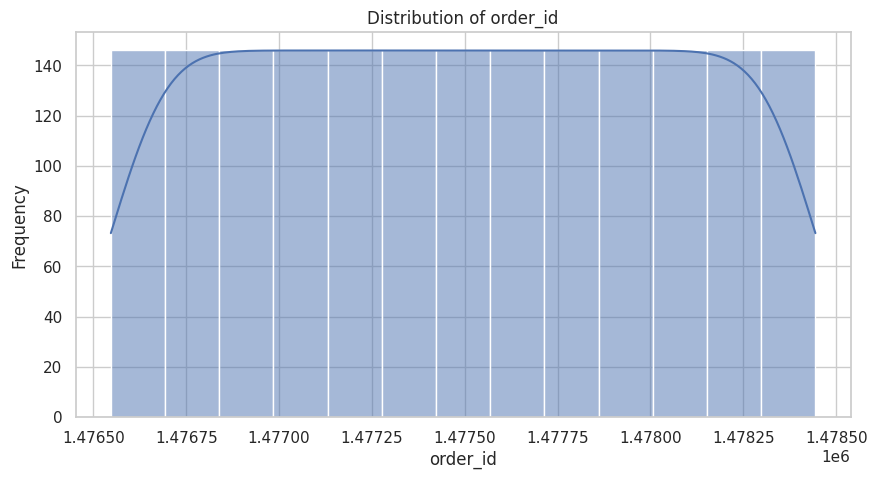

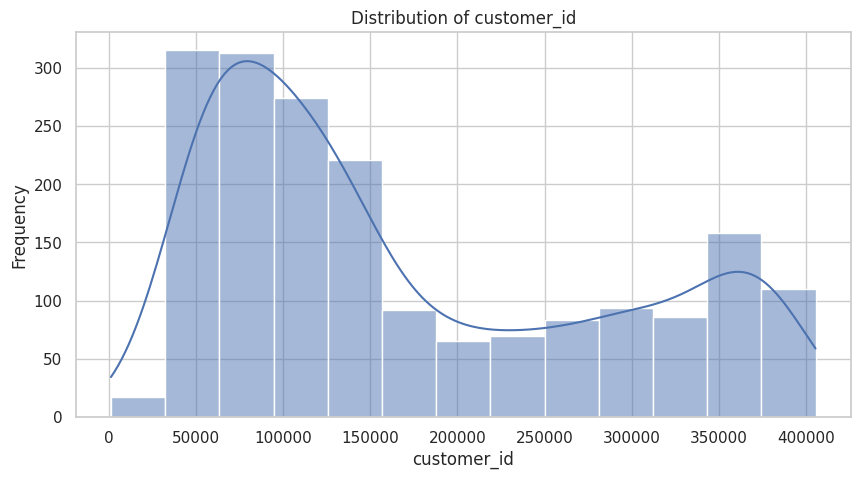

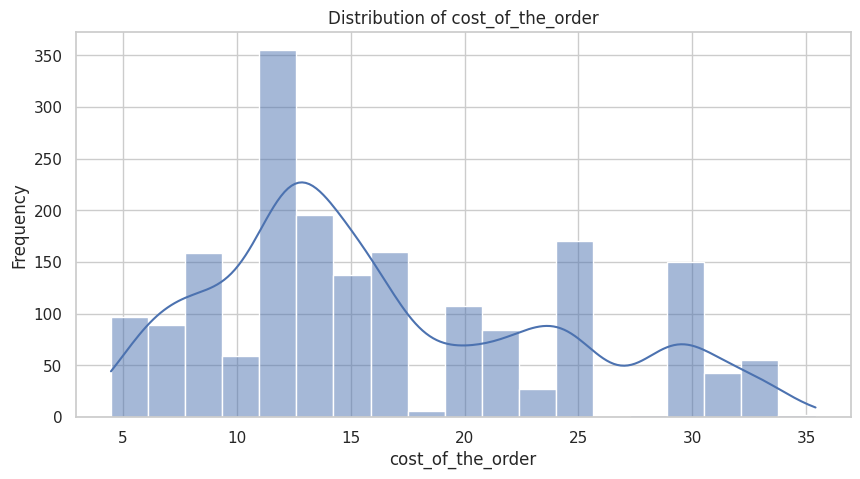

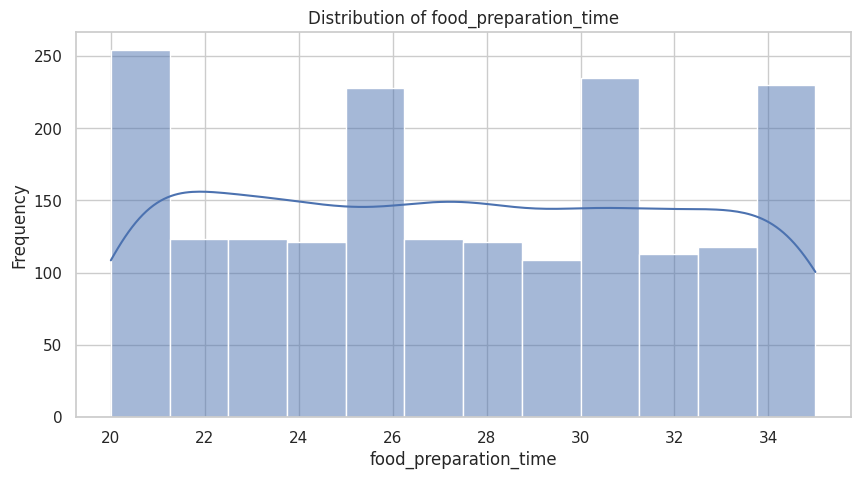

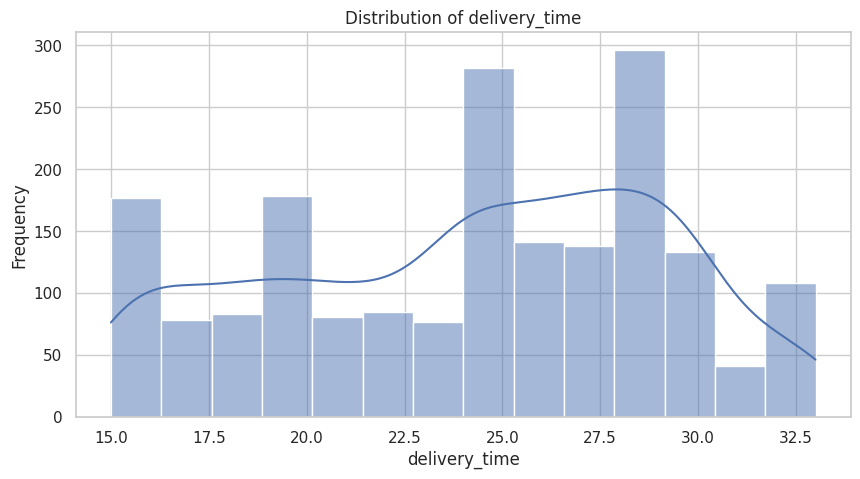

In [12]:
# Write the code here
# Set up the plotting environment
sns.set(style="whitegrid")

# List of columns to explore
columns_to_explore = df.columns

# Create histograms for numeric variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


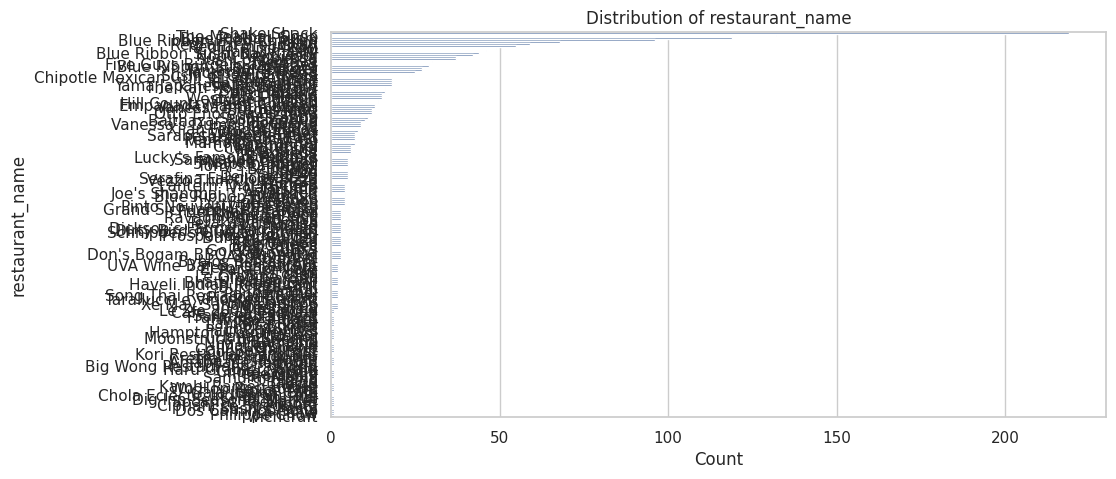

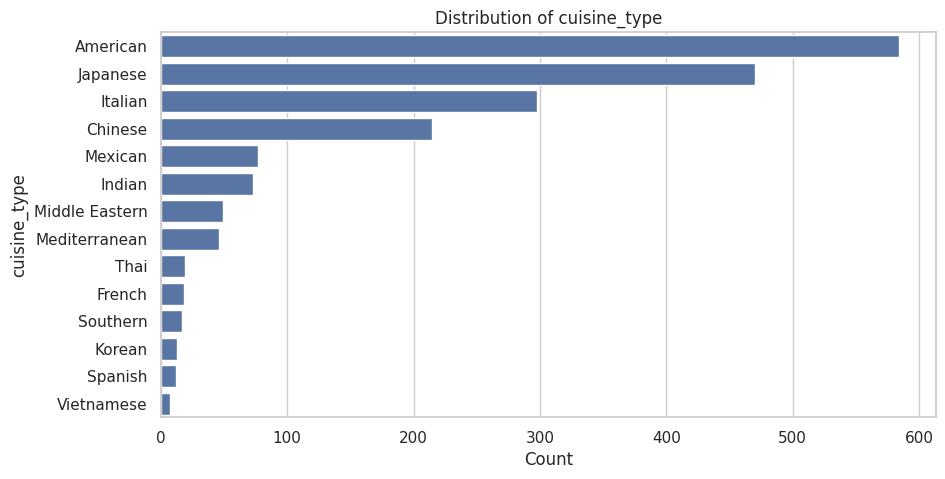

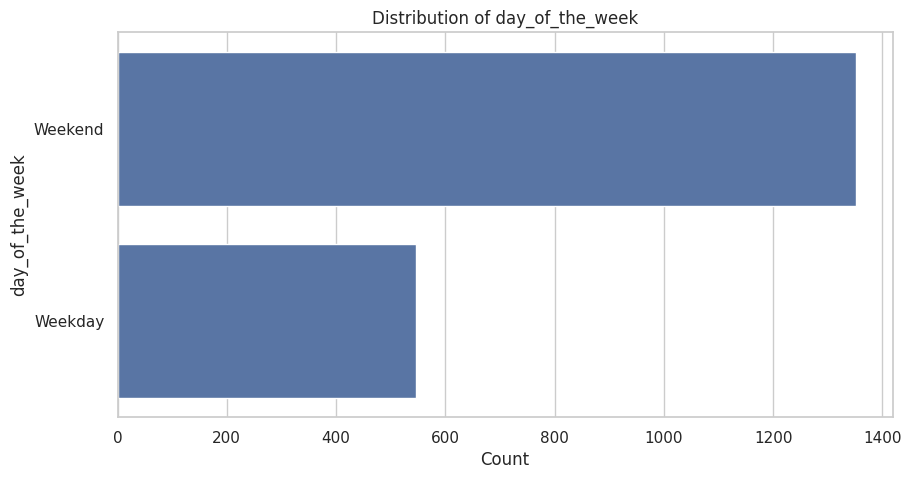

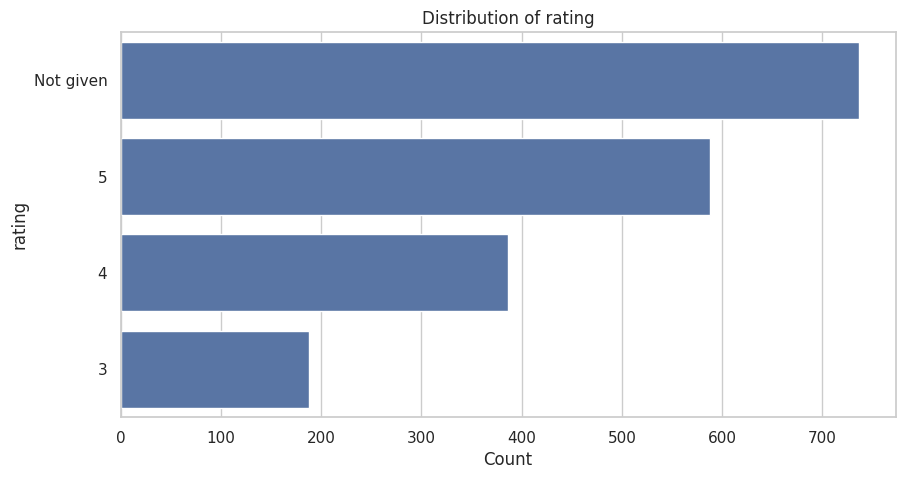

In [20]:
# Create countplots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


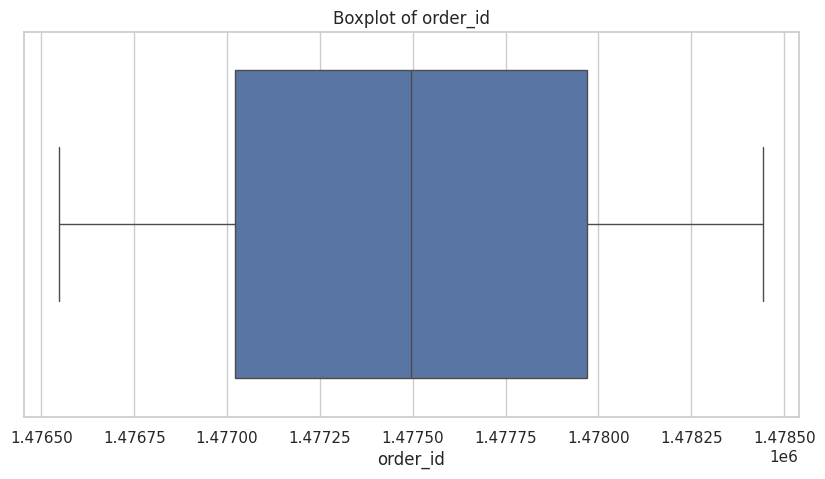

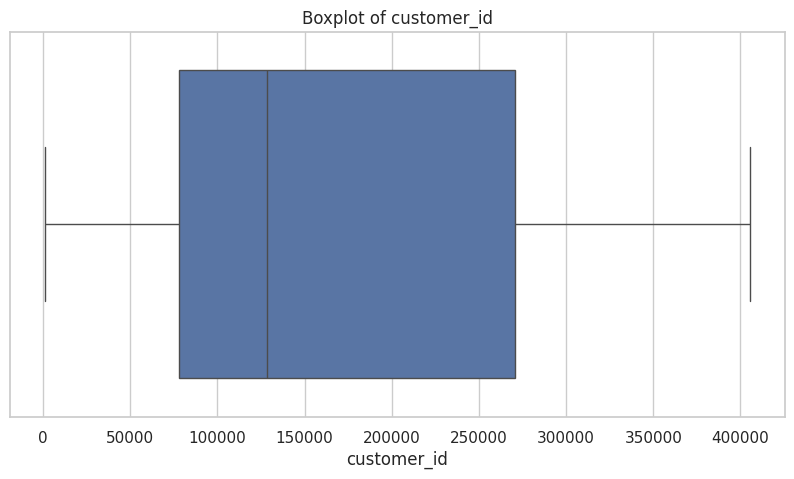

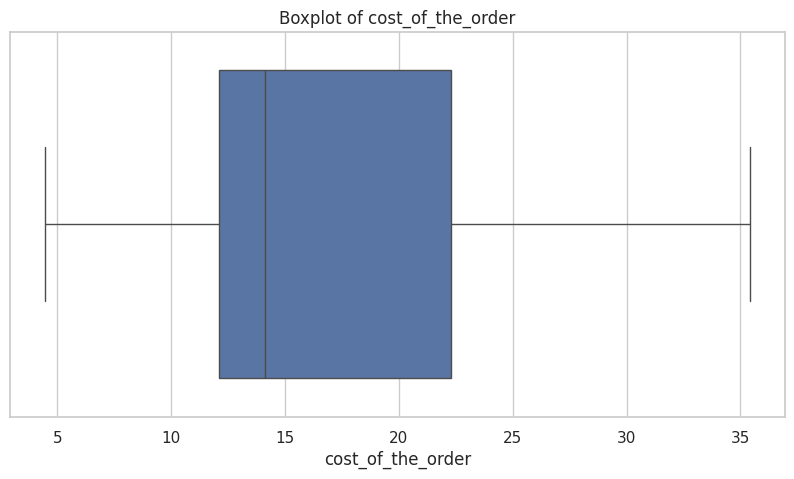

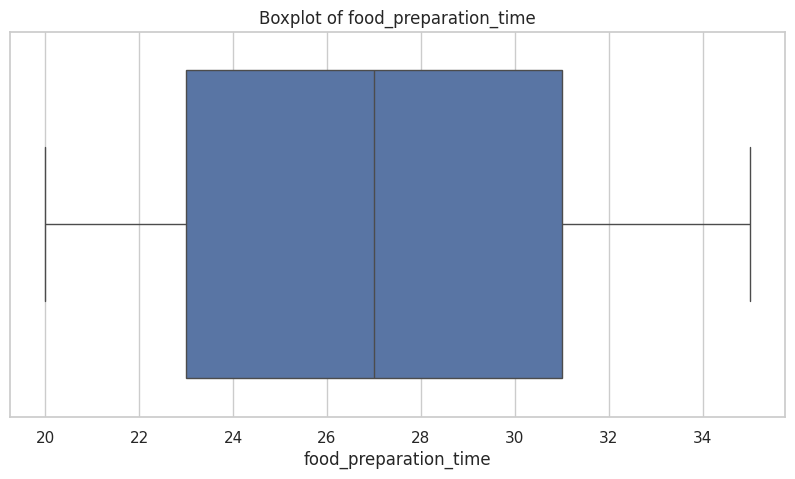

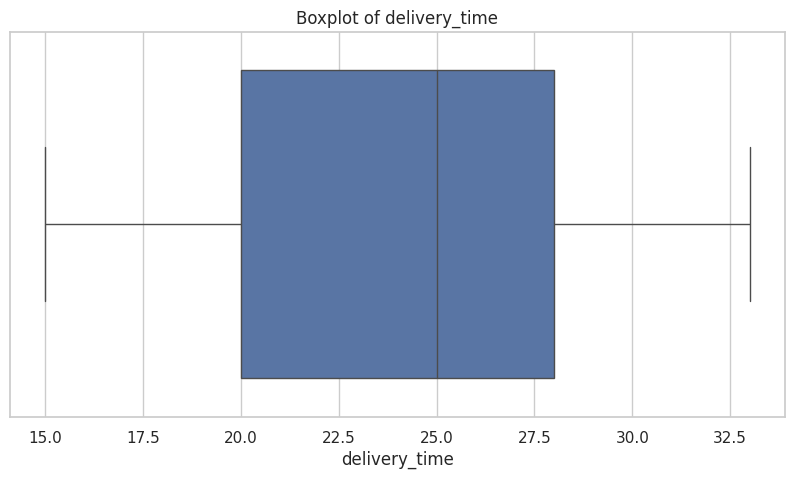

In [21]:
# Create boxplots for numeric variables
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [13]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Display the top 5 restaurants
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The top 5 restaurants in terms of the number of orders received are:

	1.	Shake Shack: 219 orders
	2.	The Meatball Shop: 132 orders
	3.	Blue Ribbon Sushi: 119 orders
	4.	Blue Ribbon Fried Chicken: 96 orders
	5.	Parm: 68 orders

### **Question 8**: Which is the most popular cuisine on weekends?

In [14]:
# Write the code here
# Filter the data for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()

# Display the most popular cuisine on weekends
print(most_popular_cuisine_weekend)

American


#### Observations:
The most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [15]:
# Write the code here
# Calculate the percentage of orders that cost more than 20 dollars
total_orders = len(df)
orders_above_20 = len(df[df['cost_of_the_order'] > 20])
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Display the percentage
print(f"Percentage of orders costing more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:
Approximately 29.24% of the orders cost more than 20 dollars.



### **Question 10**: What is the mean order delivery time?

In [16]:
# Write the code here

# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Display the mean delivery time
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
The mean order delivery time is approximately 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [19]:
# Write the code here

# Find the top 3 most frequent customers by number of orders
top_customers = df['customer_id'].value_counts().head(3)

# Create a DataFrame for better readability
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['customer_id', 'number_of_orders']

# Display the top 3 customers and their order counts
print(top_customers_df)

   customer_id  number_of_orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:
The IDs of the top 3 most frequent customers and the number of orders they placed are:

	1.	Customer ID: 52832 - 13 orders
	2.	Customer ID: 47440 - 10 orders
	3.	Customer ID: 83287 - 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

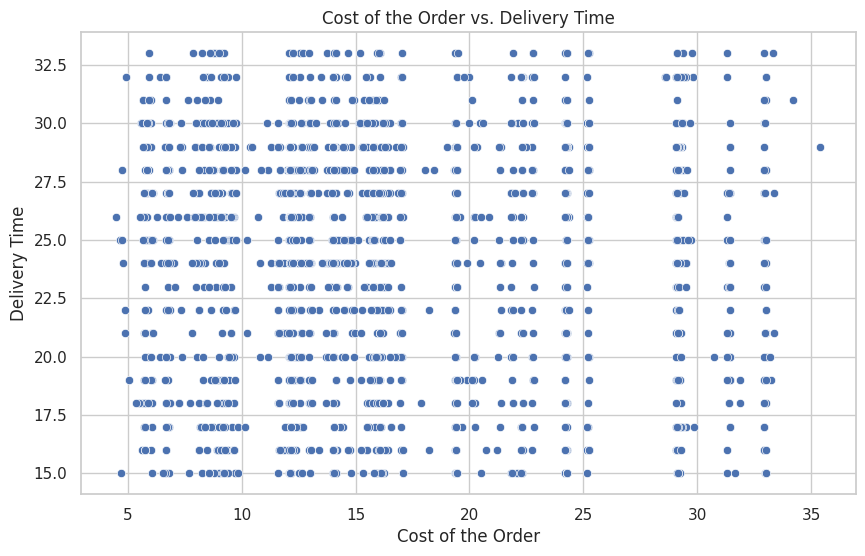

In [22]:
# Write the code here
# 1. Scatter Plot: Cost of the Order vs. Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='delivery_time', data=df)
plt.title('Cost of the Order vs. Delivery Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Delivery Time')
plt.show()


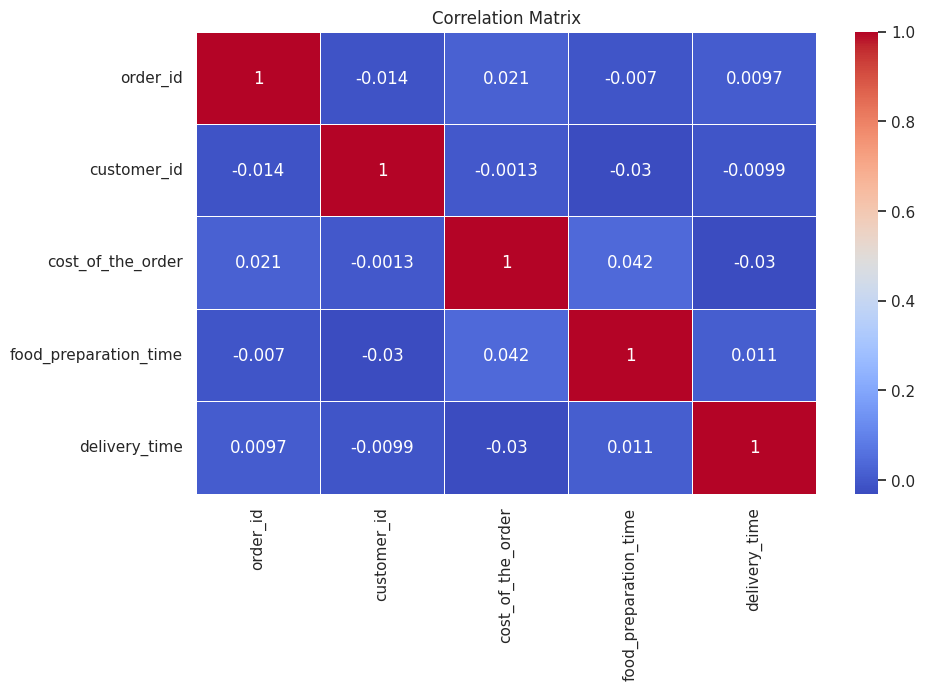

In [33]:
# 2. Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

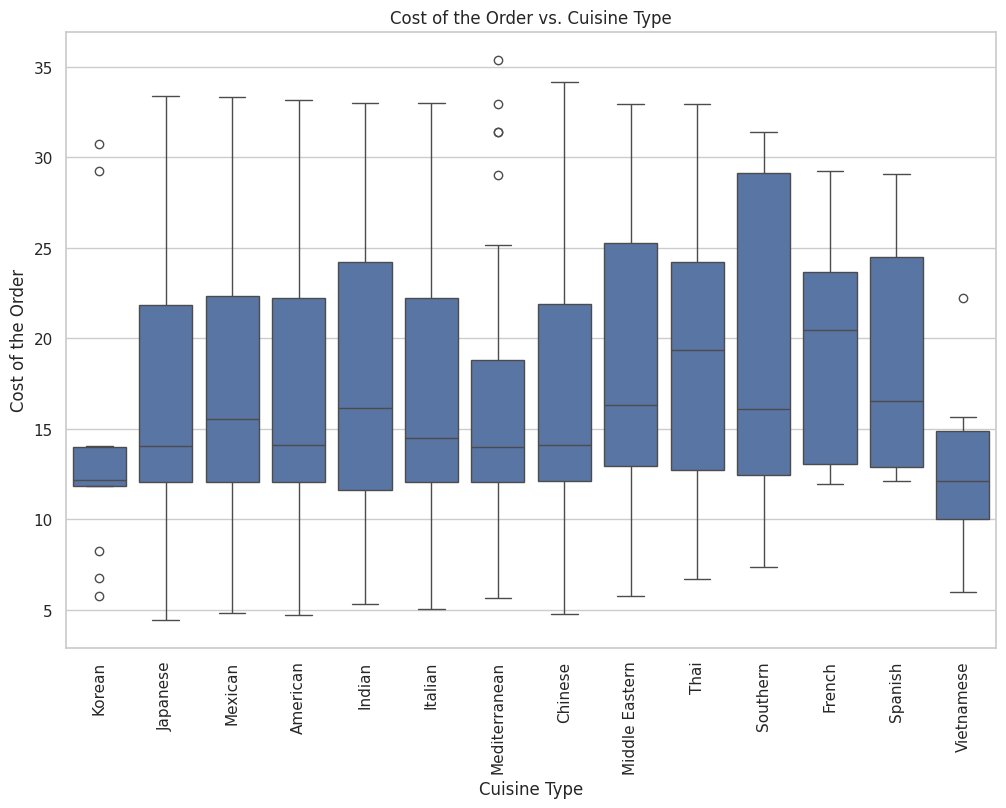

In [34]:
# 3. Box Plot: Cost of the Order vs. Cuisine Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs. Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90)
plt.show()


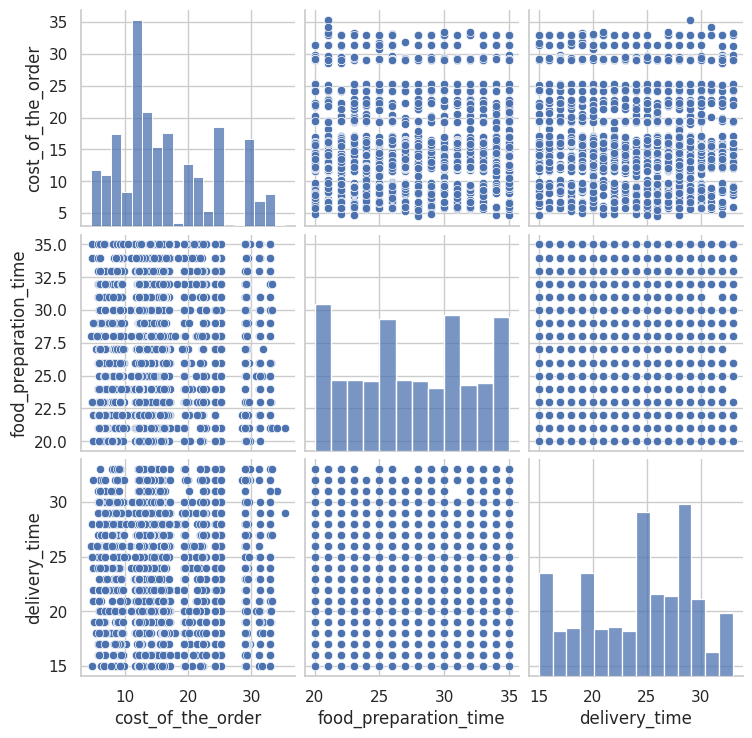

In [35]:
# 4. Pair Plot: Numerical Variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.pairplot(df[numerical_cols])
plt.show()

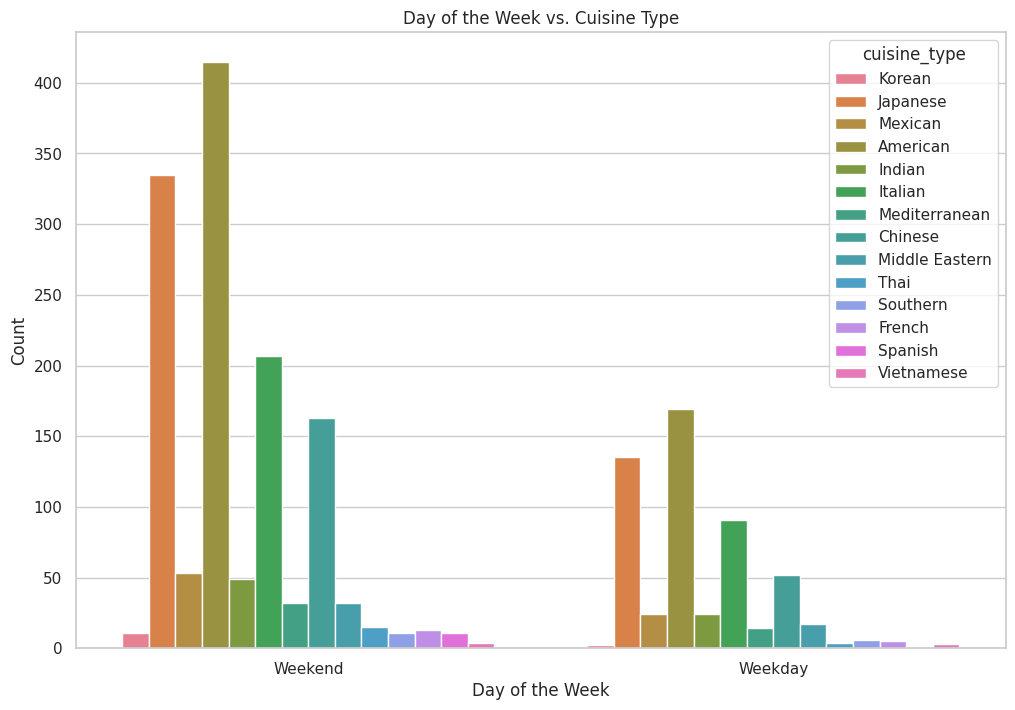

In [36]:
# 5. Bar Plot: Day of the Week vs. Cuisine Type
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=df)
plt.title('Day of the Week vs. Cuisine Type')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [39]:
# Filter out rows where the rating is 'Not given'
data_filtered = df[df['rating'] != 'Not given'].copy()

# Convert the 'rating' column to numeric
data_filtered.loc[:, 'rating'] = pd.to_numeric(data_filtered['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate the required statistics
restaurant_stats = data_filtered.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter restaurants based on the given criteria
eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)
]

# Display the eligible restaurants
print(eligible_restaurants)

               restaurant_name  rating_count average_rating
16   Blue Ribbon Fried Chicken            64       4.328125
17           Blue Ribbon Sushi            73       4.219178
117                Shake Shack           133       4.278195
132          The Meatball Shop            84       4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [41]:
# Write the code here
# Define the function to calculate the revenue
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

# Apply the function to each row to calculate the revenue
df['revenue'] = df.apply(calculate_revenue, axis=1)

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Display the total revenue
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [43]:
# Write the code here

# Calculate the total time required to deliver the food (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to get delivered
total_orders = len(df)
orders_above_60_minutes = len(df[df['total_delivery_time'] > 60])
percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

# Display the percentage
print(f'Percentage of orders taking more than 60 minutes: {percentage_above_60_minutes:.2f}%')

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [44]:
# Write the code here
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Display the mean delivery times
print(f'Mean Delivery Time on Weekdays: {mean_delivery_time_weekdays:.2f} minutes')
print(f'Mean Delivery Time on Weekends: {mean_delivery_time_weekends:.2f} minutes')

Mean Delivery Time on Weekdays: 28.34 minutes
Mean Delivery Time on Weekends: 22.47 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
Conclusions from the Analysis

	1.	Order Cost Distribution:
	  •	The majority of the orders are on the lower cost side, with a few high-cost outliers. This indicates a preference for more affordable meals among customers.

	2.	Delivery Time:
	  •	The mean delivery time is approximately 24.16 minutes.
	  •	The delivery times show a right-skewed distribution, with most deliveries happening within a shorter time frame, but some orders taking significantly longer.

	3.	Popular Restaurants and Cuisines:
	  •	The top 5 restaurants in terms of the number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
	  •	American cuisine is the most popular on weekends.

	4.	Customer Behavior:
	  •	The top 3 most frequent customers placed between 9 to 13 orders, showing high engagement from these customers.
	  •	Approximately 29.24% of the orders cost more than 20 dollars.

	5.	Promotional Offers:
	  •	Restaurants like Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop are eligible for promotional offers based on their high rating counts and average ratings above 4.

	6.	Revenue Generation:
	  •	The company charges different percentages based on the order cost, contributing to the net revenue. Orders above 20 dollars contribute more significantly to the revenue.

	7.	Delivery Time Analysis:
	  •	A small percentage of orders take more than 60 minutes to be delivered, which may affect customer satisfaction.
	  •	The mean delivery time does not significantly vary between weekdays and weekends.

### Recommendations:



Recommendations to Improve the Business

	1.	Focus on Popular and High-Rated Restaurants:
	  •	Leverage the popularity of top restaurants like Shake Shack, Blue Ribbon Sushi, and The Meatball Shop by offering exclusive promotions and advertising campaigns.
	  •	Encourage high-rated restaurants to maintain or improve their service quality by providing them with feedback and incentivizing them for high performance.

	2.	Enhance Delivery Efficiency:
	  •	Investigate and address the factors contributing to longer delivery times, especially those taking more than 60 minutes. Consider optimizing delivery routes and improving coordination between kitchen staff and delivery personnel.
	  •	Implement a tracking system to monitor and improve delivery times, ensuring timely deliveries and enhancing customer satisfaction.

	3.	Customer Engagement and Retention:
	  •	Reward frequent customers with loyalty programs, discounts, and special offers to retain them and encourage more frequent orders.
	  •	Collect and analyze feedback to understand customer preferences and areas for improvement. Use this data to personalize offers and improve customer service.

	4.	Promote High-Value Orders:
	  •	Introduce promotions and discounts for orders above a certain value to encourage higher spending.
	  •	Highlight premium meal options and combo deals that offer better value for customers while increasing the average order cost.

	5.	Diversify Cuisine Options:
	  •	While American cuisine is popular, consider promoting other cuisines that have a significant number of orders, such as Japanese and Mexican. Offering a diverse range of cuisines can attract a wider customer base.

	6.	Feedback and Ratings:
	  •	Actively solicit feedback from customers after each order to maintain a high level of service and identify any issues quickly.
	  •	Encourage customers to leave ratings and reviews by offering small incentives, as this can help new customers make informed choices and build trust in the platform.

By implementing these recommendations, the company can enhance customer satisfaction, improve operational efficiency, and drive higher revenue growth.

---